We need to import a few modules that are used in the functions to perform the PCA <br>
Modules:<br>
- numpy: Python numerical library
- pandas: Python dataframe library
- matplotlib: A plotting library
- Sci-Kit Learn: Python machine learning library
    - PCA: Perform Principle Component Analysis
    - StandardScaler: Removed the mean and sets the varience to one
- Set the style for priting to ggplot2 to mimic R-style plots
- Magic function to output plots to the screen

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from IPython.display import display
plt.style.use('ggplot')
%matplotlib inline

Make a function to read and format the data

In [2]:
def read_file(file_name):
    return pd.read_csv(file_name).pivot(index='Species',columns='m/z', values='SN').fillna(value=0)

In [3]:
# Function to Summarize PCA from: http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#license
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [4]:
def Preprocess(File_Name, var=1.00):
    # Convert from values to 1 (ion present) or 0 (ion not present), see example for format
    SN10 = File_Name.applymap(lambda x: 1 if x > 0 else 0)
    # get the number of features
    orig_cols = SN10.shape[1] 
    # setup the selector used to drop varience
    selector = VarianceThreshold(threshold=(var * (1 - var)))
    # Fit the selector to choose the low
    SN10_Low_Var = selector.fit(SN10)
    # make a list of the columns with low varience
    drop_cols = [x for x in range(0,len(SN10.columns)) if x not in list(SN10_Low_Var.get_support(indices=True))]
    # Drop the columsn in the list
    sn10_low_var = SN10.drop(SN10.columns[drop_cols], axis=1)
    # Get the number of ending columns 
    novar_cols = sn10_low_var.shape[1]
    # Print out how many columns were dropped
    print "Dropped {} low varience columns.\nStarting Columns = {}\nEnding Columns = {}"\
          .format(orig_cols - novar_cols, orig_cols, novar_cols)
    print "Preprocessing finsihed"
    return sn10_low_var



Read the data, the imput format must tbe the same as the example file Complete.csv!

In [5]:
Comp = read_file('Complete_3.csv')

In [6]:
Comp = Preprocess(Comp, var=0.90)

Dropped 138 low varience columns.
Starting Columns = 250
Ending Columns = 112
Preprocessing finsihed


For PCA the data should be scaled to avoid problems with large components skewing the data

In [7]:
scaled_Comp = StandardScaler().fit_transform(Comp)

Plot the Explained varience against the number of PC

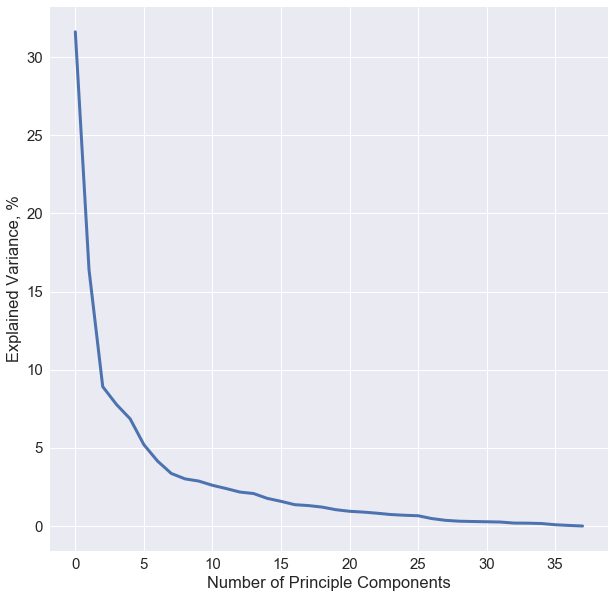

In [18]:
sns.set(font_scale=1.5)
pca_c = PCA()
pca_c.fit(scaled_Comp)
plt.figure(figsize=(10,10))
plt.plot(pca_c.explained_variance_, linewidth=3)
plt.xlabel('Number of Principle Components')
plt.ylabel('Explained Variance, %')
plt.savefig("Exp_Var.svg", format='svg')

In [9]:
pca_c.explained_variance_

array([  3.16118431e+01,   1.63895126e+01,   8.91271319e+00,
         7.77661473e+00,   6.85528207e+00,   5.20400803e+00,
         4.15217715e+00,   3.36261140e+00,   3.01532708e+00,
         2.87561440e+00,   2.60454664e+00,   2.39708191e+00,
         2.17296549e+00,   2.07810554e+00,   1.76837598e+00,
         1.57965227e+00,   1.36502844e+00,   1.30766347e+00,
         1.21014610e+00,   1.04410615e+00,   9.42368190e-01,
         8.90966021e-01,   8.19493136e-01,   7.34950433e-01,
         6.87897441e-01,   6.57337201e-01,   4.76597973e-01,
         3.63156674e-01,   3.07831459e-01,   2.88003902e-01,
         2.71534473e-01,   2.54866073e-01,   1.88145217e-01,
         1.81450711e-01,   1.59943830e-01,   8.11761959e-02,
         3.79323736e-02,   6.23433679e-30])

Plot the Sum of the explained variance against the PC

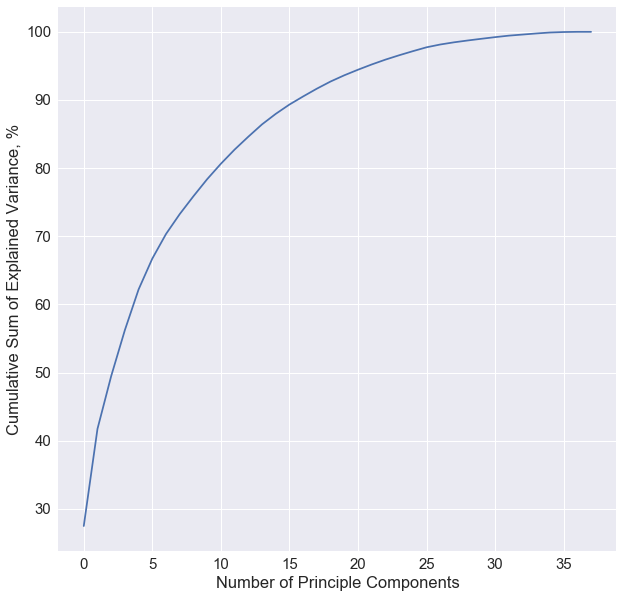

In [19]:
var = np.cumsum(np.round(pca_c.explained_variance_ratio_, decimals=4)*100)
#print var
plt.figure(figsize=(10,10))
plt.plot(var)
plt.xlabel('Number of Principle Components')
plt.ylabel('Cumulative Sum of Explained Variance, %')
plt.savefig("CumSum_Var.svg", format='svg')

A table of the top 30 PC inclduing standard deviation, Proportion of variance, and cumulative proportion using the pca_summary function above. 

In [11]:
pca30 = PCA(n_components=30)
reduced_low_var = pca30.fit_transform(scaled_Comp)
pca_summary(pca30, scaled_Comp).to_csv('pca_summary.csv')

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,5.547968,0.274821,0.274821
PC2,3.994773,0.142484,0.417305
PC3,2.945873,0.077484,0.494789
PC4,2.751721,0.067607,0.562396
PC5,2.583579,0.059597,0.621993
PC6,2.251013,0.045242,0.667234
PC7,2.010699,0.036097,0.703332
PC8,1.809453,0.029233,0.732565
PC9,1.713469,0.026214,0.758779


In [12]:
range(pca30.components_.shape[1])
len(list(Comp.columns))

112

[Text(1,0,u'601'),
 Text(1,0,u'605'),
 Text(1,0,u'609'),
 Text(1,0,u'611'),
 Text(1,0,u'619'),
 Text(1,0,u'623'),
 Text(1,0,u'629'),
 Text(1,0,u'631'),
 Text(1,0,u'635'),
 Text(1,0,u'639'),
 Text(1,0,u'651'),
 Text(1,0,u'653'),
 Text(1,0,u'667'),
 Text(1,0,u'669'),
 Text(1,0,u'673'),
 Text(1,0,u'681'),
 Text(1,0,u'689'),
 Text(1,0,u'695'),
 Text(1,0,u'697'),
 Text(1,0,u'701'),
 Text(1,0,u'705'),
 Text(1,0,u'711'),
 Text(1,0,u'717'),
 Text(1,0,u'719'),
 Text(1,0,u'733'),
 Text(1,0,u'755'),
 Text(1,0,u'763'),
 Text(1,0,u'766'),
 Text(1,0,u'771'),
 Text(1,0,u'785'),
 Text(1,0,u'791'),
 Text(1,0,u'801'),
 Text(1,0,u'805'),
 Text(1,0,u'813'),
 Text(1,0,u'827'),
 Text(1,0,u'829'),
 Text(1,0,u'831'),
 Text(1,0,u'843'),
 Text(1,0,u'849'),
 Text(1,0,u'865'),
 Text(1,0,u'867'),
 Text(1,0,u'869'),
 Text(1,0,u'887'),
 Text(1,0,u'895'),
 Text(1,0,u'903'),
 Text(1,0,u'917'),
 Text(1,0,u'923'),
 Text(1,0,u'933'),
 Text(1,0,u'942'),
 Text(1,0,u'945'),
 Text(1,0,u'947'),
 Text(1,0,u'958'),
 Text(1,0,u'

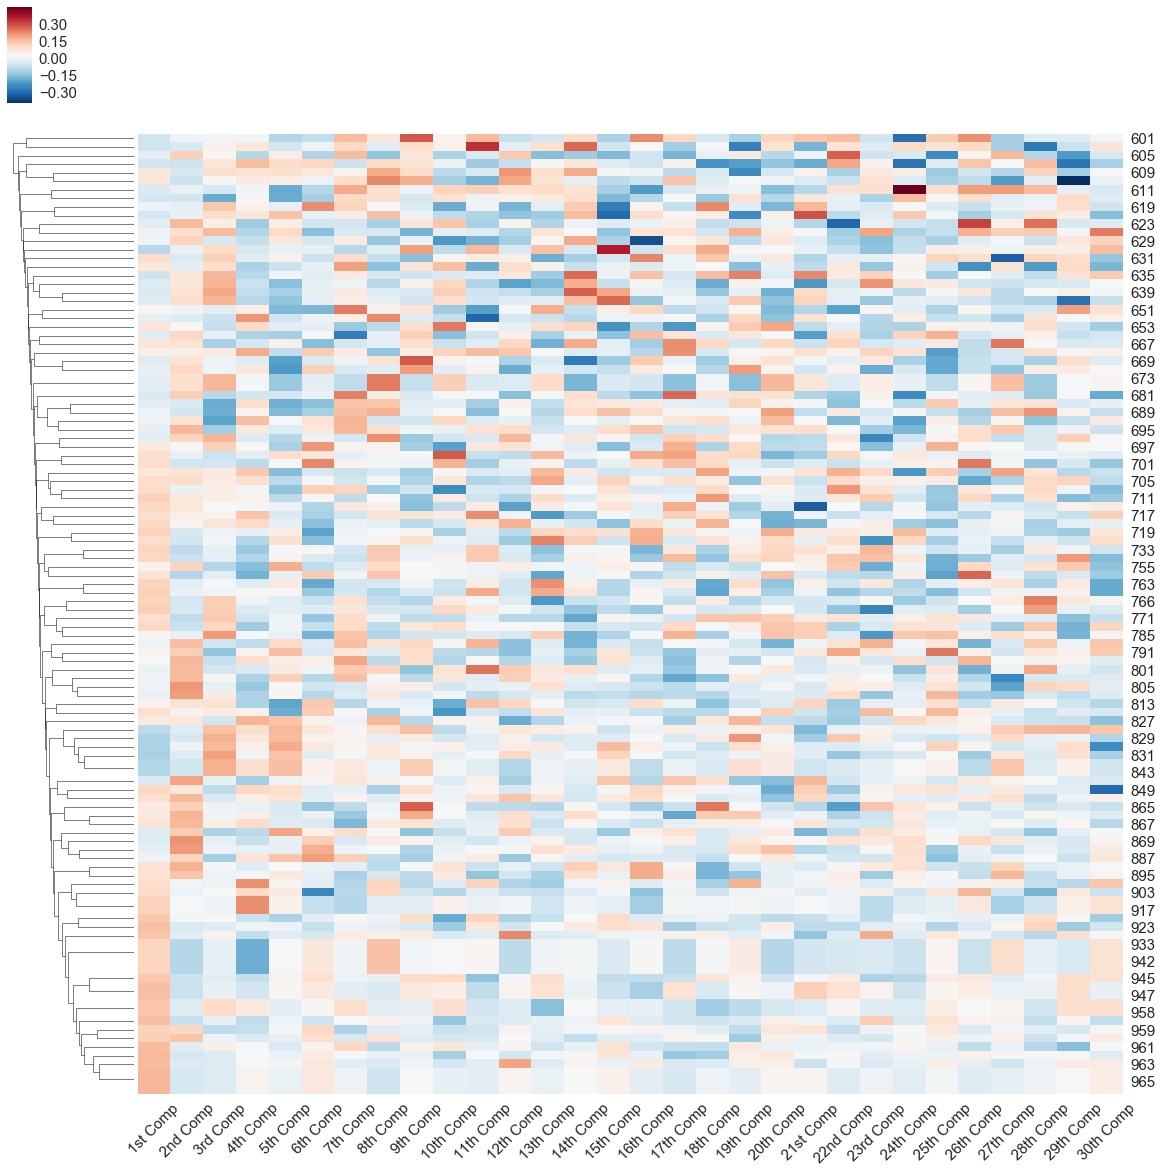

In [13]:
Components = ["1st Comp", "2nd Comp", "3rd Comp", "4th Comp", "5th Comp", "6th Comp", "7th Comp","8th Comp",\
              "9th Comp", "10th Comp", "11th Comp", "12th Comp", "13th Comp", "14th Comp", "15th Comp", "16th Comp",\
              "17th Comp", "18th Comp", "19th Comp", "20th Comp", "21st Comp", "22nd Comp", "23rd Comp", "24th Comp",\
              "25th Comp", "26th Comp", "27th Comp", "28th Comp", "29th Comp", "30th Comp"]

pca_plot = sns.clustermap(data=pca30.components_.T, cmap="RdBu_r", col_cluster=False, figsize=(20, 20))
pca_plot.ax_heatmap.set_xticklabels(Components, rotation=45)
pca_plot.ax_heatmap.set_yticklabels(list(Comp.columns))

In [14]:
pca10 = PCA(n_components=5)
PCA10 = pca10.fit_transform(scaled_Comp)

[Text(1,0,u'601'),
 Text(1,0,u'605'),
 Text(1,0,u'609'),
 Text(1,0,u'611'),
 Text(1,0,u'619'),
 Text(1,0,u'623'),
 Text(1,0,u'629'),
 Text(1,0,u'631'),
 Text(1,0,u'635'),
 Text(1,0,u'639'),
 Text(1,0,u'651'),
 Text(1,0,u'653'),
 Text(1,0,u'667'),
 Text(1,0,u'669'),
 Text(1,0,u'673'),
 Text(1,0,u'681'),
 Text(1,0,u'689'),
 Text(1,0,u'695'),
 Text(1,0,u'697'),
 Text(1,0,u'701'),
 Text(1,0,u'705'),
 Text(1,0,u'711'),
 Text(1,0,u'717'),
 Text(1,0,u'719'),
 Text(1,0,u'733'),
 Text(1,0,u'755'),
 Text(1,0,u'763'),
 Text(1,0,u'766'),
 Text(1,0,u'771'),
 Text(1,0,u'785'),
 Text(1,0,u'791'),
 Text(1,0,u'801'),
 Text(1,0,u'805'),
 Text(1,0,u'813'),
 Text(1,0,u'827'),
 Text(1,0,u'829'),
 Text(1,0,u'831'),
 Text(1,0,u'843'),
 Text(1,0,u'849'),
 Text(1,0,u'865'),
 Text(1,0,u'867'),
 Text(1,0,u'869'),
 Text(1,0,u'887'),
 Text(1,0,u'895'),
 Text(1,0,u'903'),
 Text(1,0,u'917'),
 Text(1,0,u'923'),
 Text(1,0,u'933'),
 Text(1,0,u'942'),
 Text(1,0,u'945'),
 Text(1,0,u'947'),
 Text(1,0,u'958'),
 Text(1,0,u'

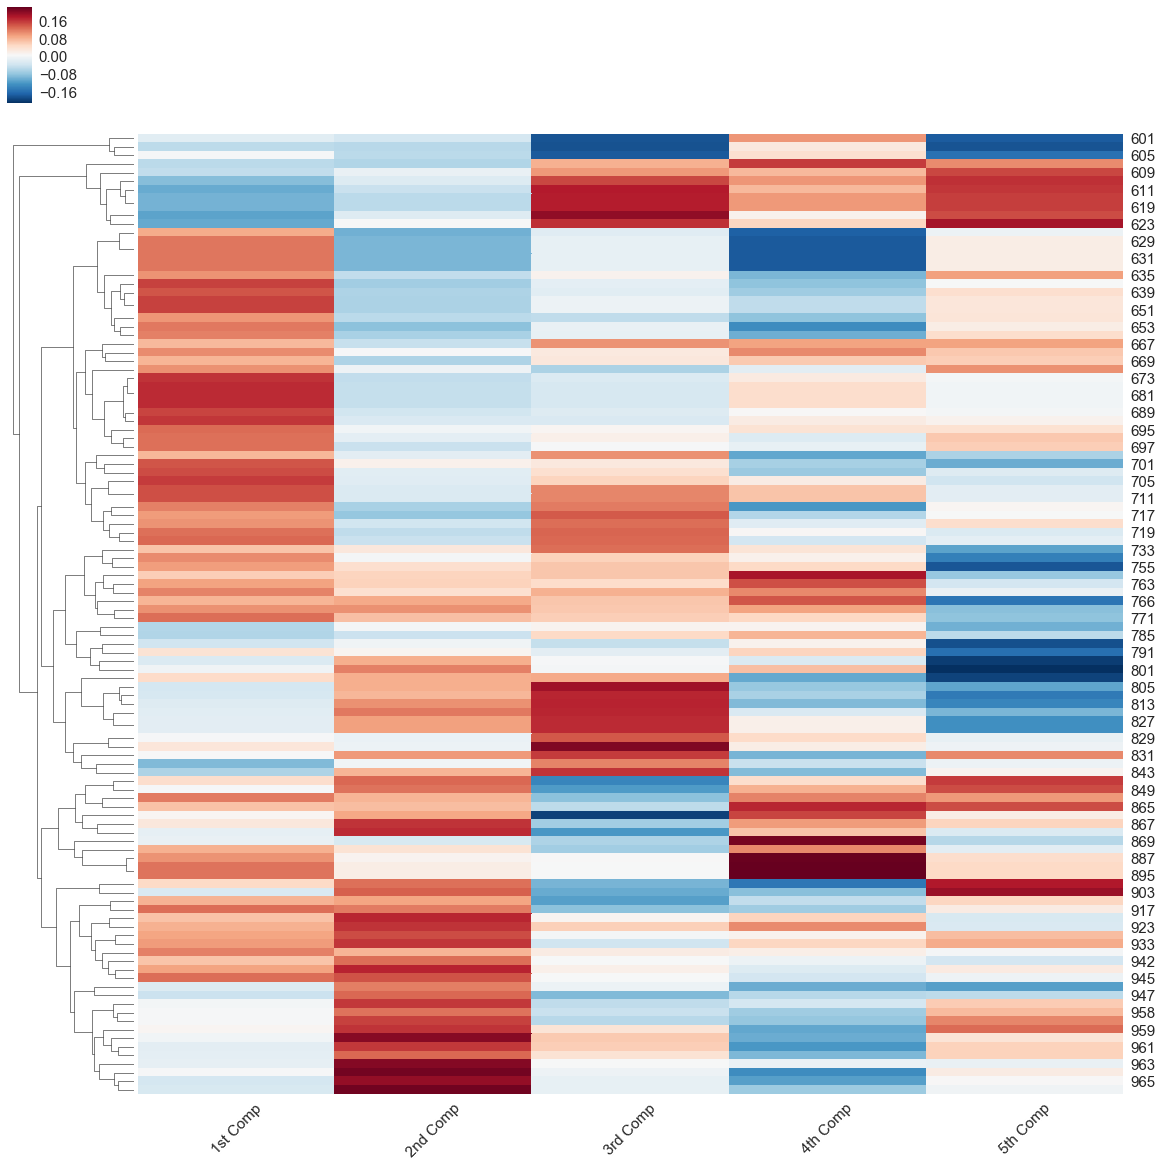

In [15]:
Components = ["1st Comp", "2nd Comp", "3rd Comp", "4th Comp", "5th Comp", "6th Comp", "7th Comp","8th Comp",\
              "9th Comp", "10th Comp"]

pca_plot = sns.clustermap(data=pca10.components_.T, cmap="RdBu_r", col_cluster=False, figsize=(20, 20))
pca_plot.ax_heatmap.set_xticklabels(Components, rotation=45)
pca_plot.ax_heatmap.set_yticklabels(list(Comp.columns))